In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/',force_remount = True)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/merged.csv")

categorical_feature_mask = df.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))


1780890

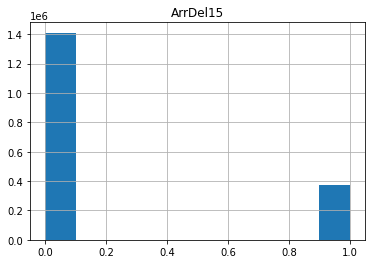

In [0]:
import matplotlib.pyplot as plt
df.hist(column='ArrDel15')

df[df.ArrDel15 == 1].count()
df.count()[0]

In [0]:
from sklearn.utils import shuffle
df = shuffle(df)

df_train_classifier =  df[:1424712] 

df_train_regressor =   df[:1424712]
df_train_regressor = df_train_regressor[df_train_regressor.ArrDel15 != 0.0]

df_test = df[1424712:]

print(df[df.ArrDel15 == 1].count()[0],df.count()[0])
print(len(df_train_regressor),len(df_train_classifier))

370611 1780890
295927 1424712


In [0]:
y_trainc = np.array(df_train_classifier['ArrDel15'])
df_train_classifier = df_train_classifier.drop(['Unnamed: 0','ArrDel15','ArrTime','ArrDelayMinutes','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','DepDel15','date_A','date_D'],axis=1)
X_trainc = np.array(df_train_classifier)

len(y_trainc)

1424712

In [0]:
y_trainr = np.array(df_train_regressor['ArrDelayMinutes'])
df_train_regressor = df_train_regressor.drop(['Unnamed: 0','ArrDel15','ArrTime','ArrDelayMinutes','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','DepDel15','date_A','date_D'],axis=1)
X_trainr = np.array(df_train_regressor)

In [0]:
y_testr = np.array(df_test['ArrDelayMinutes'])
y_testc = np.array(df_test['ArrDel15'])
df_test = df_test.drop(['Unnamed: 0','ArrDel15','ArrTime','ArrDelayMinutes','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','DepDel15','date_A','date_D'],axis=1)
X_test = np.array(df_test)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_trainc, y_trainc)
predictions = clf.predict(X_test)
print(classification_report(y_testc, predictions))


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf = clf.fit(X_trainc, y_trainc)

In [0]:
y_predc = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_testc, y_predc))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    281494
         1.0       0.90      0.69      0.78     74684

    accuracy                           0.92    356178
   macro avg       0.91      0.83      0.86    356178
weighted avg       0.92      0.92      0.91    356178



In [0]:
from sklearn.ensemble import ExtraTreesRegressor

rgr = ExtraTreesRegressor(n_estimators=100, random_state=0)
rgr.fit(X_trainr, y_trainr)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [0]:
print(len(y_predc))
print(len(y_testc))
print(len(X_test))

print(np.sum(y_predc),np.sum(y_testc))
np.count_nonzero(y_predc)
nonzeropred =  y_predc.nonzero()[0]
print(nonzeropred, nonzeropred.shape)

356178
356178
356178
57177.0 74684.0
[     2      8     11 ... 356133 356149 356150] (57177,)


In [0]:
X_test  =  np.delete(X_test ,np.where( y_predc < 1)[0],axis=0)
y_testr =  np.delete(y_testr,np.where( y_predc < 1)[0],axis=0)

In [0]:
print(len(y_testr))
print(len(X_test))
print(len(y_predc))
print(len(y_predc.nonzero()[0]))
np.count_nonzero(y_predc)
X_test.shape,y_testr.shape

57177
57177
356178
57177


((57177, 35), (57177,))

In [0]:
X_test  =  np.delete(X_test , y_predc.nonzero()[0],axis=0)
y_testr =  np.delete(y_testr, np.where(y_predc != 0),axis=0)
y_predc =  np.delete(y_predc, np.where(y_predc != 0),axis=0)

In [0]:
from sklearn import metrics

In [0]:
y_predr = rgr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testr, y_predr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testr, y_predr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testr, y_predr)))

Mean Absolute Error: 4.69925631518501
Mean Squared Error: 118.04522929154692
Root Mean Squared Error: 10.86486213863512
